### Пример / Example
# Exploratory Analysis Data (EDA, Разведочный Анализ Данных)

#### Импорт датасета и первичная проверка данных

In [2]:
# импортируем библиотеки и загружаем датасет (стандартный из библиотеки seaborn)
import seaborn as sns
import pandas as pd

df = sns.load_dataset("tips")

In [58]:
# Набор данных содержит информацию об размере чека, 
# размере чаевых, также имеется информация о посетителе и его заказе

df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [59]:
# Датасет состоит из 244 строк и 7 столбцов
df.shape

(244, 7)

In [60]:
# В датасете есть и количественные и категориальные переменные
df.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [61]:
# делаем проверку на наличие отсутствующих значений 
df.isna().sum() # по столбцам
df.isna().sum(axis=1) # по строкам

0      0
1      0
2      0
3      0
4      0
      ..
239    0
240    0
241    0
242    0
243    0
Length: 244, dtype: int64

### Проверка основных статистик данных датасета

In [62]:
# Посмотрим на основные статистические показатели для столбцов (включая категориальные)
# Это также позволяет увидеть, есть ли в столбце какие-то сильно выбивающиеся значения

# В данном случае таких показателей не навблюдается
df.describe(include="all").T.round(2)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
total_bill,244.0,NaN,NaN,NaN,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,NaN,NaN,NaN,2.998279,1.383638,1.0,2.0,2.9,3.5625,10.0
sex,244,2,Male,157,NaN,NaN,NaN,NaN,NaN,NaN,NaN
smoker,244,2,No,151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,244,4,Sat,87,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time,244,2,Dinner,176,NaN,NaN,NaN,NaN,NaN,NaN,NaN
size,244.0,NaN,NaN,NaN,2.569672,0.9511,1.0,2.0,2.0,3.0,6.0


### Анализ данных (+визуализация)

In [63]:
# Посмотрим более подробно какой средний чек, чаевые и какой средний размер заказа в разрезе пола
sex = df.groupby("sex").agg('mean').reset_index()
sex

,sex,total_bill,tip,size
0,Male,20.744076,3.089618,2.630573
1,Female,18.056897,2.833448,2.459770


<AxesSubplot:title={'center':'Средний Чек, Чаевые и Размер заказа в разрезе пола'}, xlabel='SEX'>

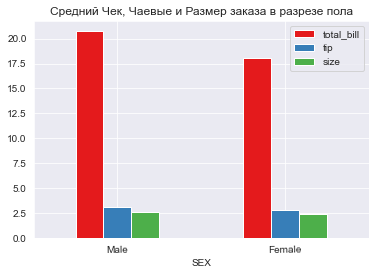

In [64]:
# Построим график для наглядности
sex.plot(kind = "bar", xlabel = "SEX", grid = True, x = "sex", 
         title = "Средний Чек, Чаевые и Размер заказа в разрезе пола", rot=True)

<AxesSubplot:title={'center':'Соотношение посетителей'}>

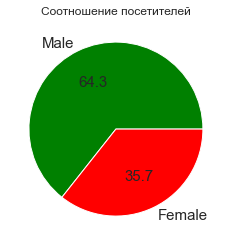

In [88]:
# Посмотрим общее соотношение посетителей по полу
# по количеству 
# df["sex"].value_counts()  
# либо по долям 
Sex_Percentage = df["sex"].value_counts(normalize=True)*100
Sex_Percentage.plot(kind = "pie", autopct="%.1f", 
                    title = "Соотношение посетителей", ylabel='', fontsize=15, colors = ['green', 'red'])

<AxesSubplot:title={'center':'Cумма чека по дням'}, xlabel='day'>

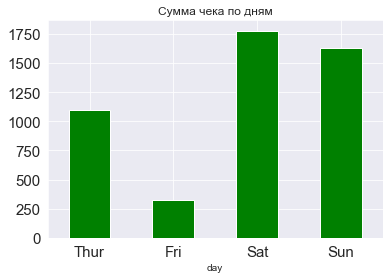

In [66]:
# Посмотрим какая сумма чека получается по дням недели 
df.groupby("day")["total_bill"].sum().round(2).plot(kind="bar", rot=False, 
mark_right = False, color = "green", fontsize = 15, grid=True, title="Cумма чека по дням")

In [91]:
# Пример задания: найти посетителя, который оставил максимальные чаевые?
df[df["tip"] == df["tip"].max()]

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.0,Male,Yes,Sat,Dinner,3


<AxesSubplot:xlabel='smoker', ylabel='total_bill'>

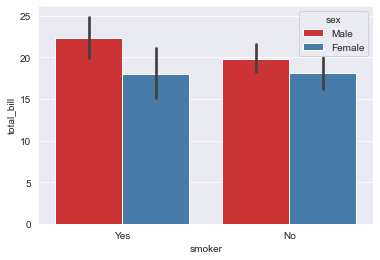

In [68]:
#Сравним количество чаевых, оставляемых среди курящих и некурящих, по признаку пола
sns.barplot(x="smoker", y="total_bill", data=df, hue="sex")

[Text(0, 0.5, 'Количество'),
 Text(0.5, 0, ''),
 Text(0.5, 1.0, 'Количество курящих и некурящих')]

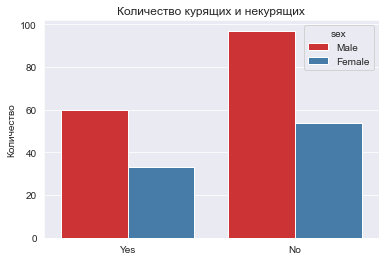

In [69]:
#Посчитаем число курящих и некурящих посетителей по признаку пола
smokers = df.groupby("sex")["smoker"].value_counts().reset_index()

# sns.set_style('darkgrid')
# sns.set_palette('Set1')
sns.barplot(x="level_1", y="smoker", hue="sex", data=smokers).set(ylabel='Количество',xlabel='',title="Количество курящих и некурящих")

<AxesSubplot:>

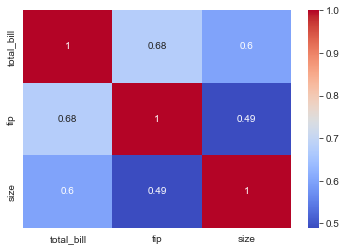

In [70]:
# Проверка корреляции по датасету (количественных переменных)
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

[Text(0.5, 0, 'Размер чека'),
 Text(0, 0.5, 'Размер чаевых'),
 Text(0.5, 1.0, 'Корреляция чека и чаевых')]

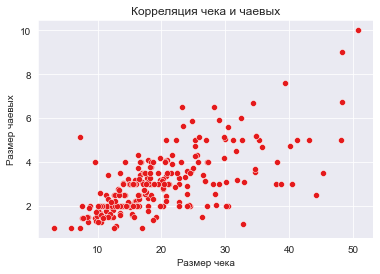

In [71]:
# Отношение чаевых к общему чеку
sns.scatterplot(x = "total_bill", y="tip", data =df).set(xlabel="Размер чека", ylabel="Размер чаевых", title="Корреляция чека и чаевых")

# Анализ с использованием гипотез

#### Критерий хи-квадрат 

In [72]:
smokers

,sex,level_1,smoker
0,Male,No,97
1,Male,Yes,60
2,Female,No,54
3,Female,Yes,33


In [73]:
# Создаем сводную таблицу для переменных
smokers.pivot_table(index="sex", columns="level_1", values="smoker", margins=True, margins_name='Total').reset_index()

level_1,sex,Yes,No,Total
0,Male,60.0,97.0,78.5
1,Female,33.0,54.0,43.5
2,Total,46.5,75.5,61.0


In [74]:
# Гипотеза H0 - нет взаимосвязи между переменными пола и курением
# Гипотеза H1 - есть взаимосвязь между переменными пола и курением

In [75]:
#Посчитаем Критерий хи-квадрат
from scipy.stats import chi2_contingency

# задаем данные
data = [[60,97], [33,54]]
stat, p, dof, expected = chi2_contingency(data)

# альфа значение и p-показатель 
alpha = 0.05
print("p показатель = " + str(p))

if p <= alpha:
    print('Отобранные Переменные Зависимы (H0 не правдива)')
else:
    print('Отобранные Переменные Независимы (H0 правдива)')
print("---")
print(stat)
print(dof)
print(expected)

p показатель = 1.0
Отобранные Переменные Независимы (H0 правдива)
---
0.0
1
[[59.84016393 97.15983607]
 [33.15983607 53.84016393]]


### Сделаем проверку на зависимость по критерию хи-квадрат для переменных пола и дней посещения

In [76]:
#### Гипотеза H0 - нет взаимосвязи между переменными пола и днями посещения
#### Гипотеза H1 - есть взаимосвязь между переменными пола и днями посещения

In [77]:
# Подготовим таблицу для анализа
Pdays = df.groupby("sex")["day"].value_counts().reset_index()
Pdays.sort_values(by="sex")

,sex,level_1,day
0,Male,Sat,59
1,Male,Sun,58
2,Male,Thur,30
3,Male,Fri,10
4,Female,Thur,32
5,Female,Sat,28
6,Female,Sun,18
7,Female,Fri,9


In [78]:
# Создадим сводную таблицу
Pdays.pivot_table(index="sex", columns="level_1", values="day", margins=True, margins_name="Total")

level_1,Thur,Fri,Sat,Sun,Total
sex,,,,,
Male,30,10.0,59.0,58,39.25
Female,32,9.0,28.0,18,21.75
Total,31,9.5,43.5,38,30.50


In [79]:
#Посчитаем Критерий хи-квадрат

# задаем данные
data = [[30,10,59,58], [32,9,28,18]]
stat, p, dof, expected = chi2_contingency(data)

# альфа значение и p-показатель 
alpha = 0.05
print("p показатель = " + str(p))

if p <= alpha:
    print('Отобранные Переменные Зависимы (H0 не правдива)')
else:
    print('Отобранные Переменные Независимы (H0 правдива)')
print("---")
print(stat)
print(dof)
print(expected)

p показатель = 0.004180302092822257
Отобранные Переменные Зависимы (H0 не правдива)
---
13.22200137240661
3
[[39.89344262 12.22540984 55.9795082  48.90163934]
 [22.10655738  6.77459016 31.0204918  27.09836066]]


#### Исходя из результата анализа, можно утверждать, 
#### что пол посетителя связан с днями посещения, 
#### т.е. мужчины и женщины имеют различные предпочтения по дням посещения ресторана

<AxesSubplot:xlabel='level_1', ylabel='day'>

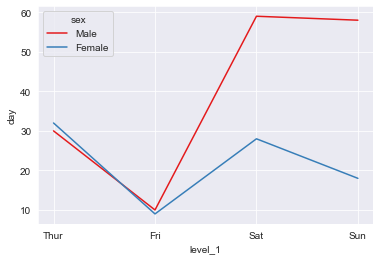

In [95]:
# В дополнение построим график 
Pdays
sns.lineplot(x = "level_1", y = "day", data= Pdays, hue="sex")